# Intervalle de prédiction - Modèle linéaire

Nous allons simuler un jeu de données pour tester la normalité des erreurs et construire un intervalle de prédiction.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import linregress

sns.set()
np.random.seed(1)

n = 200

X = 20 * np.random.randn(n) + 100
y = X + (10 * np.random.randn(n) + 50)
# fit linear regression model
b1, b0, r_value, p_value, std_err = linregress(X, y)

bar_X = np.mean(X)
nvar = n * np.std(X)**2
sigma_hat = np.sqrt(np.sum((y - (b0 + b1 * X))**2) / (n - 2))
b0

52.76489356087447

Nous allons obtenir une régression linéaire très classique.

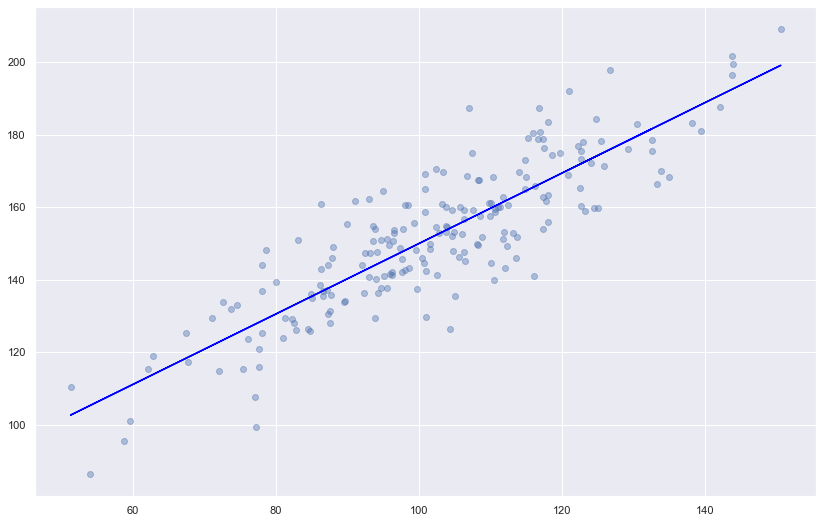

In [5]:
# TODO : Afficher les points et tracer la droite de régression linéaire
plt.figure(figsize=(14,9))
plt.scatter(X, y, alpha=0.4)
plt.plot(X, b0 + b1 * X, color="blue")
plt.show()

Maintenant, nous allons étudier l'intervalle de prédiction en un point $x$.

In [6]:
def prediction_interval_span(x):
    """
    Calcule la longueur de l'intervalle de prédiction pour un x donné
    """
    return 1.96 * sigma_hat * np.sqrt(1 + 1 / n + (x - bar_X)**2 / nvar)

Il ne reste plus qu'à tracer cette erreur de prédiction.

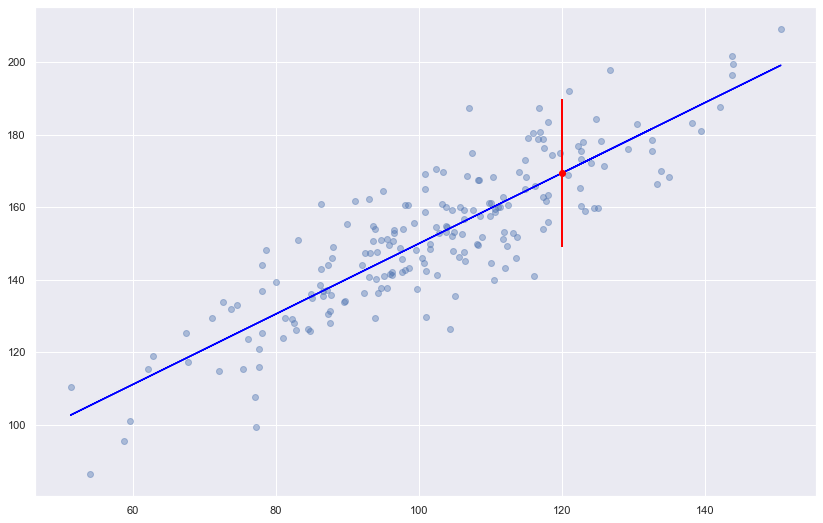

In [7]:
x_new = 120
y_new = b0 + b1 * x_new

plt.figure(figsize=(14,9))
# Affiche les points
plt.scatter(X, y, alpha=0.4)
# Affiche la droite
plt.plot(X, b0 + b1 * X, color="blue")
# Affiche une barre d'erruer
plt.errorbar(x_new, y_new, yerr=prediction_interval_span(x_new), color="red", elinewidth=2, fmt='o')
plt.show()

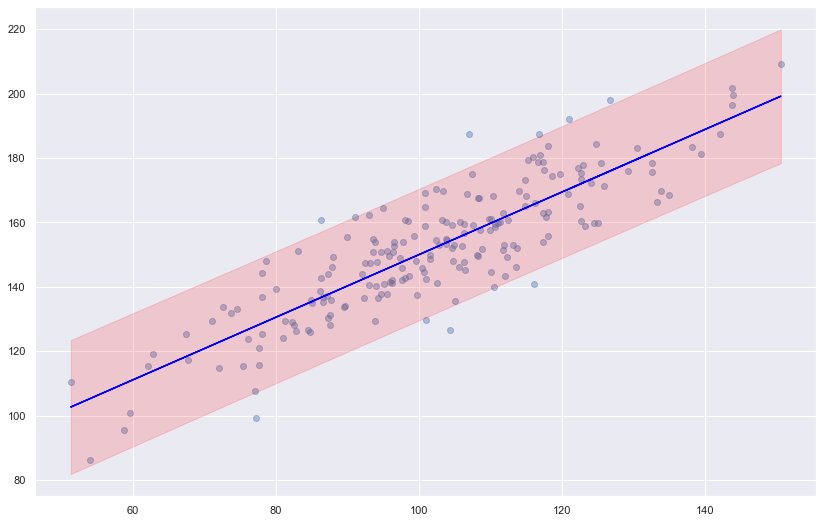

In [9]:
# TODO : Tracer la bande d'intervalle de prédiction à l'aide de la fonction plt.gca().fill_between
I = np.linspace(min(X), max(X), 100)
y_I = b0 + b1 * I
interval = np.vectorize(prediction_interval_span)(I)

plt.figure(figsize=(14,9))
plt.scatter(X, y, alpha=0.4)
plt.plot(X, b0 + b1 * X, color='blue')

plt.gca().fill_between(I, y_I - interval, y_I + interval,
                          color="red",
                          alpha=0.15,
                          label="Intervalle de prédiction 95%")


plt.show()

In [14]:
interval

array([20.81160727, 20.79641853, 20.78152162, 20.76691715, 20.75260574,
       20.73858801, 20.72486454, 20.71143593, 20.69830274, 20.68546554,
       20.67292487, 20.66068129, 20.64873532, 20.63708747, 20.62573825,
       20.61468815, 20.60393766, 20.59348724, 20.58333735, 20.57348844,
       20.56394094, 20.55469526, 20.54575182, 20.53711101, 20.52877321,
       20.52073879, 20.51300812, 20.50558152, 20.49845934, 20.49164188,
       20.48512946, 20.47892237, 20.47302087, 20.46742525, 20.46213574,
       20.45715259, 20.45247602, 20.44810623, 20.44404344, 20.44028781,
       20.43683952, 20.43369873, 20.43086557, 20.42834017, 20.42612266,
       20.42421312, 20.42261165, 20.42131832, 20.42033318, 20.41965628,
       20.41928766, 20.41922732, 20.41947527, 20.4200315 , 20.42089599,
       20.42206869, 20.42354955, 20.42533851, 20.42743549, 20.42984038,
       20.43255308, 20.43557347, 20.43890141, 20.44253676, 20.44647934,
       20.45072898, 20.45528549, 20.46014866, 20.46531828, 20.47

In [5]:
Liste=[[5,7,3,2],[12,15]]
def trier_liste(l):
 
    for i in range(0,len(Liste)-1):
        print(i)
        for j in range(i+1,len(Liste)):
            if Liste[i]>Liste[j]:
                a=Liste[i]
                Liste[i]=Liste[j]
                Liste[j]=a
                 
                
    print(Liste)

trier_liste(Liste)
Liste[0][1]
    
    

0
[[5, 7, 3, 2], [12, 15]]


7

In [173]:
Liste=[[5,7],[12,15]]
def transpose(a):
    return [[a[j][i] for j in range(len(a))] for i in range(len(a[0]))]

In [174]:
transpose(Liste)

[[5, 12], [7, 15]]

In [175]:
a=[[5, 12], [7, 15]]
l=[[a[j][i] for j in range(len(a))] for i in range(len(a))]
l

[[5, 7], [12, 15]]

In [176]:
def mat_mult_one_line(a,b):
    return [[ sum([i*j for (i,j) in zip(row,col)]) for col in zip(*b)]for row in a]

In [177]:
a=[[5, 12], 
   [7, 15]]
b=[[14, 85], [20, 5]]

mat_mult_one_line(a,b)

[[310, 485], [398, 670]]

In [180]:
def mult_mat_with_zip(a,b):
    res = []
    for row in a: # lignes matrice a

        new_row = []
        for col in zip(*b):
           # colonnes matrice b
            tmp = sum([i*j for (i,j) in zip(row, col)])
            new_row.append(tmp)
        res.append(new_row)
    return res
            
mult_mat_with_zip(a,b)

[[310, 485], [398, 670]]

In [23]:
theArray = [['a','b','c'],['d','e','f'],['g','h','i']]
#print(*zip(*theArray))


In [35]:
def presentation(title, **kwargs):
    print ('---- %s ----' %(title))

    name=kwargs.get('name', None)
    firstname=kwargs.get('firstname', None)

    if (name and firstname):
        print('mon nom est %s, %s %s' %(name, firstname, name))
    elif (firstname and not(name)):
        print('Mon prenom est %s' %(firstname))
    elif (not(firstname) and name):
        print('Mon nom est %s' %(name))
    else:
        print('Je ne suis personne...')

if __name__ == "__main__":
    presentation('Prenom+nom', firstname='James', name='Bond')
    presentation('Seulement un prenom', firstname='James')
    presentation('Seulement un nom', name='Bond')
    presentation('ni nom, ni prenom')

---- Prenom+nom ----
mon nom est Bond, James Bond
---- Seulement un prenom ----
Mon prenom est James
---- Seulement un nom ----
Mon nom est Bond
---- ni nom, ni prenom ----
Je ne suis personne...


In [38]:
def print_my_list(title_list, title_dict, *my_list, **my_dict):
    # Dans ce namespace, my_dict est un dictionnaire et my_list une liste
    
    print('ici les elements de la liste %s' % (title_list))
    for idx,value in enumerate(my_list):
        print('Index %02d: %s' % (idx, value))

    print('voici les elements du dictionnaire %s' % (title_dict))
    for key,value in my_dict.items():
        print('Element %s: %s' % (key, value))

if __name__ == '__main__':
    print_my_list('haythem', 'dict 0', 0, 1, 2, 3, zero=0, un=1, deux=2, trois=3, quatre=4, cinq=5)

ici les elements de la liste haythem
Index 00: 0
Index 01: 1
Index 02: 2
Index 03: 3
voici les elements du dictionnaire dict 0
Element zero: 0
Element un: 1
Element deux: 2
Element trois: 3
Element quatre: 4
Element cinq: 5


In [36]:
def mult_mat_with_zip(c,l):
    for row in c: # lignes matrice a
        print(row)
        for col in zip (*k):
            print(col)
       
          

In [19]:
c=[[2,6,21],[45,9,7],[78,10,15]]
k=[[1,5,65],[8,18,2],[13,20,13]]
mult_mat_with_zip(c,k)

[2, 6, 21]
(1, 8, 13)
(5, 18, 20)
(65, 2, 13)
[45, 9, 7]
(1, 8, 13)
(5, 18, 20)
(65, 2, 13)
[78, 10, 15]
(1, 8, 13)
(5, 18, 20)
(65, 2, 13)


('x', 3) ('y', 4) ('z', 5)


[[323, 538, 415]]

In [136]:
def mult_mat_with_zip(c):
    for row in c: # lignes matrice a
        print(row)
        

In [137]:
c=[[2,6,21],[45,9,7],[78,10,15]]
#k=[[1,5,65],[8,18,2],[13,20,13]]
mult_mat_with_zip(c)

[2, 6, 21]
[45, 9, 7]
[78, 10, 15]


In [134]:
def mult_mat_with_zip(c):
    for row in zip(*c): # lignes matrice a
        print(row)

In [135]:
c=[[2,6,21],[45,9,7],[78,10,15]]
#k=[[1,5,65],[8,18,2],[13,20,13]]
mult_mat_with_zip(c)

(2, 45, 78)
(6, 9, 10)
(21, 7, 15)


In [149]:
a = 'AB'
b = ('C', 'D')
c = ['E', 'F']
d = {'G', 'H'}
e = {0:'I', 1:'J'}
x = *a, *e
x


('A', 'B', 0, 1)

In [150]:
def f (subject, verb):
    print (subject, verb)
x = 'Amiga', 'rulez!'    # Rappel : notation simplifiée pour créer un tuple
f (*x)
x = {'verb':'rulez!', 'subject':'Amiga'}
f (**x)

Amiga rulez!
Amiga rulez!


In [162]:
def n (*args, **kwargs):
    print (' '.join(args), kwargs['computer'], kwargs['model'])
def g (*args, **kwargs):
    n(*args, **kwargs)        # Déballage pour l'appel
g ('I', 'love',computer='Haythem', model='500')


I love Haythem 500
